# Challenge 5

## Reading Materials

### Required Reading


## Activity 1
Due: September 6, 2018

In Activity 1, you are tasked with building a binary classifier based on SVM.
Each student has their own files, and should work in place.
```python
student_identity = 'netid'
training = '5challenge_training_' + student_identity + '.csv'
testing = '5challenge_testing_' + student_identity + '.csv'
```

### Deliverables
 1. Fill column ```Class``` in the testing file.
 2. Commit your change on Git.
 3. Describe the Kernel you used for your SVM. Plot the decision region juxtaposed with the training set.


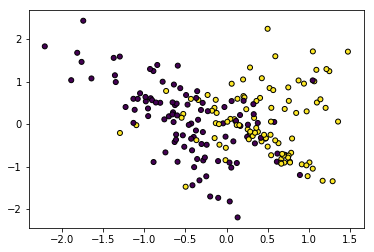

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_identity = 'ssankaran30'

filenameToRead = '5challenge_training_ssankaran30.csv'
training_df = pd.read_csv('5challenge_training_ssankaran30.csv')

#print(training_df.head())

X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1[:,0],
            s=25, edgecolor='k')

plt.show()


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1, test_size = 0.2)

In [30]:
from sklearn import svm

# SVC with linear kernel
svc = svm.SVC(kernel='linear').fit(X_train, Y_train)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=1.0).fit(X_train, Y_train)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0).fit(X_train, Y_train)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=1.0).fit(X_train, Y_train)

#plot_decision_function(X_train, Y_train, X_test, Y_test, svc)

C:\Users\Samyuktha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


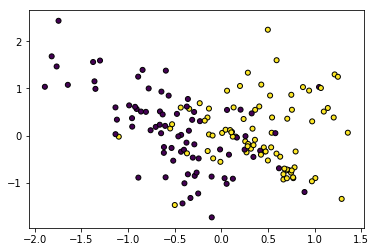

In [34]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train[:,0],
            s=25, edgecolor='k')

plt.show()

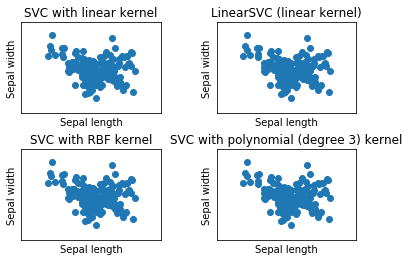

In [36]:
h = 0.2
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
       'LinearSVC (linear kernel)',
        'SVC with RBF kernel',
        'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
     plt.subplot(2, 2, i + 1)
     plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
 # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z)
 
 # Plot also the training points
     plt.scatter(X_train[:, 0], X_train[:, 1])#, c=Y_train, cmap=plt.cm.coolwarm)
     plt.xlabel('Sepal length')
     plt.ylabel('Sepal width')
     plt.xlim(xx.min(), xx.max())
     plt.ylim(yy.min(), yy.max())
     plt.xticks(())
     plt.yticks(())
     plt.title(titles[i])
 
plt.show()

In [24]:
y_pred = svc.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[16  5]
 [ 4 15]]
             precision    recall  f1-score   support

          0       0.80      0.76      0.78        21
          1       0.75      0.79      0.77        19

avg / total       0.78      0.78      0.78        40



In [26]:
count = 0
for i in range(40):
    if(y_pred[i] == Y_test[i]):
        count += 1;
accuracy = count/40;
accuracy
    

0.775

[2.14710685 0.53417641]


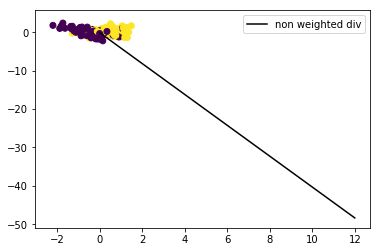

In [27]:
w = svcclassifier.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - svcclassifier.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X1[:, 0], X1[:, 1], c = Y1[:,0])
plt.legend()
plt.show()